## Linear Regrression on CNB Bank Dataset

About Company:
CNB Bank deals in all kinds of car loans. Customer first apply for loan after that company validates the customer eligibility for loan. In case the borrower doesn’t pay back the loan, the losses are to be incurred by the bank.
 
Problem:
The bank wants to automate the loss estimation based on customer detail provided while applying for loan. These details are Age, Years of Experience, Number of cars, Gender, Marital Status. To automate this process, they have given a problem to identify the loss estimation given that the customers is a defaulter, those are eligible for loan amount so that they get to know what features are leading to defaults upto which amount. Here are the details about the data set.

Data:

Variable			Description
Ac_No				The account of customer used as identifier
Age				Age of borrower (16-70)
Years of Experience		working experience (0-53)
Number of Cars			Possessed cars (1,2,3,4)
Gender				Male/Female
Married			Married/Single
Loss in Thousands		Target variable

### Read the dataset

In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import math

In [2]:
bank_df = pd.read_csv("LGD_DATA.csv")

In [3]:
bank_df.head()

,Ac_No,Age,Years of Experience,Number of Vehicles,Gender,Married,Losses in Thousands
0,150024,24,5,1,M,Married,203.319595
1,144880,31,10,1,F,Single,402.197302
2,133742,56,37,1,M,Married,553.132096
3,151282,52,31,1,F,Married,292.430579
4,174407,20,3,1,M,Single,246.540576


In [4]:
bank_df.isna().sum()

Ac_No                  0
Age                    0
Years of Experience    0
Number of Vehicles     0
Gender                 0
Married                0
Losses in Thousands    0
dtype: int64

In [5]:
bank_df.isnull().sum()

Ac_No                  0
Age                    0
Years of Experience    0
Number of Vehicles     0
Gender                 0
Married                0
Losses in Thousands    0
dtype: int64

In [6]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15290 entries, 0 to 15289
Data columns (total 7 columns):
Ac_No                  15290 non-null int64
Age                    15290 non-null int64
Years of Experience    15290 non-null int64
Number of Vehicles     15290 non-null int64
Gender                 15290 non-null object
Married                15290 non-null object
Losses in Thousands    15290 non-null float64
dtypes: float64(1), int64(4), object(2)
memory usage: 836.2+ KB


In [7]:
bank_df.describe()

,Ac_No,Age,Years of Experience,Number of Vehicles,Losses in Thousands
count,15290.000000,15290.000000,15290.000000,15290.000000,15290.000000
mean,149961.789339,42.328254,23.732897,2.495880,389.859718
std,28947.841061,18.280511,17.850707,0.953776,253.729433
min,100002.000000,16.000000,0.000000,1.000000,12.534521
25%,124900.500000,24.000000,6.000000,2.000000,226.434217
50%,149897.500000,42.000000,23.000000,2.000000,354.937874
75%,175019.500000,61.000000,42.000000,3.000000,488.676927
max,200454.000000,70.000000,53.000000,4.000000,3500.000000


In [9]:
lb_en = LabelEncoder()

### Split x and y

In [106]:
x = bank_df.loc[:,['Years of Experience','Number of Vehicles','Gender','Married']]
y = bank_df.iloc[:,-1]

In [91]:
x.head()

,Years of Experience,Number of Vehicles,Gender,Married
0,5,1,M,Married
1,10,1,F,Single
2,37,1,M,Married
3,31,1,F,Married
4,3,1,M,Single


In [32]:
y.head()

0    203.319595
1    402.197302
2    553.132096
3    292.430579
4    246.540576
Name: Losses in Thousands, dtype: float64

### Plot the pair plot

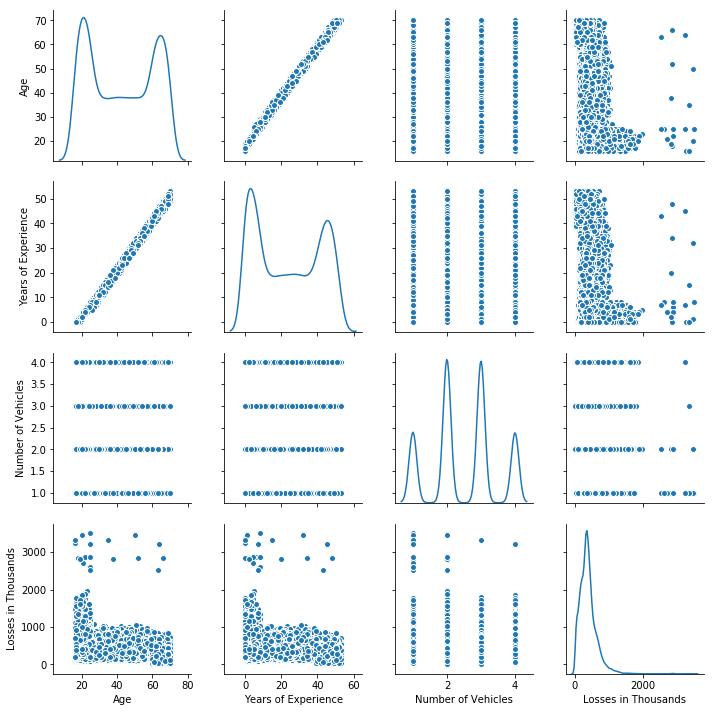

In [22]:
sns.pairplot(bank_df.iloc[:,1:], diag_kind='kde')

### Correlation Matrix

In [28]:
con_vars = bank_df.loc[:,['Age','Years of Experience','Number of Vehicles','Gender','Married']]

In [29]:
con_vars.head()

,Age,Years of Experience,Number of Vehicles,Gender,Married
0,24,5,1,M,Married
1,31,10,1,F,Single
2,56,37,1,M,Married
3,52,31,1,F,Married
4,20,3,1,M,Single


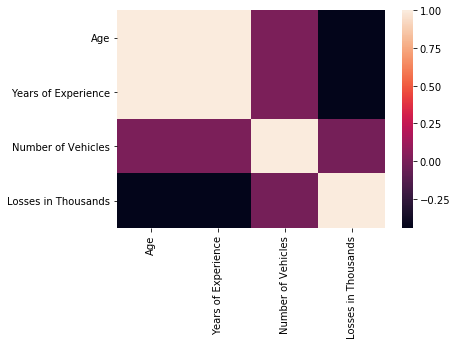

In [26]:
sns.heatmap(con_vars.corr())

In [27]:
con_vars.corr()

,Age,Years of Experience,Number of Vehicles,Losses in Thousands
Age,1.000000,0.997161,0.008366,-0.442962
Years of Experience,0.997161,1.000000,0.008545,-0.442115
Number of Vehicles,0.008366,0.008545,1.000000,-0.011553
Losses in Thousands,-0.442962,-0.442115,-0.011553,1.000000


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


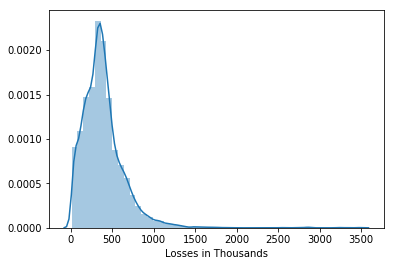

In [36]:
sns.distplot(y,bins=50)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


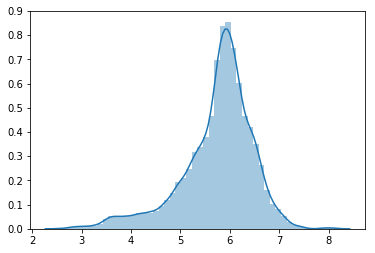

In [190]:
# this probably means we shud take the log to normalize the data
sns.distplot(list(map(math.log,bank_df['Losses in Thousands'])),kde=True,bins=50)
# map function is used to apply any function on each element of a series/list
# now the distribution looks normal

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


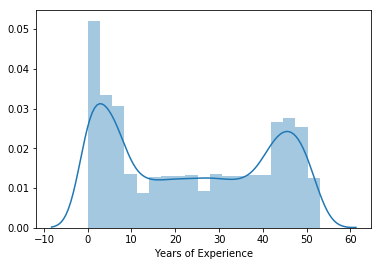

In [191]:
sns.distplot(bank_df['Years of Experience'])

## Encoding Categorical variables

In [107]:
from sklearn.preprocessing import LabelEncoder

In [108]:
label_en = LabelEncoder()

In [109]:
x.iloc[:,2] = label_en.fit_transform(x.iloc[:,2])

In [110]:
x.head()

,Years of Experience,Number of Vehicles,Gender,Married
0,5,1,1,Married
1,10,1,0,Single
2,37,1,1,Married
3,31,1,0,Married
4,3,1,1,Single


In [111]:
x.iloc[:,3] = label_en.fit_transform(x.iloc[:,3])

In [112]:
from sklearn.preprocessing import OneHotEncoder

In [113]:
onehot = OneHotEncoder(categorical_features = [3])

In [114]:
xy = onehot.fit_transform(x).toarray()

In [115]:
xx = pd.DataFrame(xy)

In [116]:
xx.head()

,0,1,2,3,4
0,1.0,0.0,5.0,1.0,1.0
1,0.0,1.0,10.0,1.0,0.0
2,1.0,0.0,37.0,1.0,1.0
3,1.0,0.0,31.0,1.0,0.0
4,0.0,1.0,3.0,1.0,1.0


In [117]:
onehot = OneHotEncoder(categorical_features = [4])

In [118]:
xz = onehot.fit_transform(xx).toarray()

In [119]:
xa = pd.DataFrame(xz, columns=['Married_Yes', 'Married_No', 'Gender_male','Gender_female','Years of Experience','Number of Vehicles'])

In [120]:
xa.head()

,Married_Yes,Married_No,Gender_male,Gender_female,Years of Experience,Number of Vehicles
0,0.0,1.0,1.0,0.0,5.0,1.0
1,1.0,0.0,0.0,1.0,10.0,1.0
2,0.0,1.0,1.0,0.0,37.0,1.0
3,1.0,0.0,1.0,0.0,31.0,1.0
4,0.0,1.0,0.0,1.0,3.0,1.0


## Using Dummies for categorical variables

In [122]:
dummy_var = pd.get_dummies(bank_df['Gender'], drop_first=True) ##drop_first=True to remove the first column

In [123]:
dummy_var.head()

,M
0,1
1,0
2,1
3,0
4,1


In [124]:
dummy_var2 = pd.get_dummies(bank_df['Married'], drop_first=True) ##drop_first=True to remove the first column

In [129]:
new_df = pd.concat([bank_df,dummy_var,dummy_var2],axis=1)

In [130]:
new_df.head()

,Ac_No,Age,Years of Experience,Number of Vehicles,Gender,Married,Losses in Thousands,M,Single
0,150024,24,5,1,M,Married,203.319595,1,0
1,144880,31,10,1,F,Single,402.197302,0,1
2,133742,56,37,1,M,Married,553.132096,1,0
3,151282,52,31,1,F,Married,292.430579,0,0
4,174407,20,3,1,M,Single,246.540576,1,1


In [131]:
new_df.drop(['Ac_No','Gender','Married'],axis=1,inplace=True)
new_df.head()

,Age,Years of Experience,Number of Vehicles,Losses in Thousands,M,Single
0,24,5,1,203.319595,1,0
1,31,10,1,402.197302,0,1
2,56,37,1,553.132096,1,0
3,52,31,1,292.430579,0,0
4,20,3,1,246.540576,1,1


### New x and y

In [171]:
x = new_df.loc[:,['Age','Years of Experience','Number of Vehicles','M','Single']]
y = new_df.loc[:,['Losses in Thousands']]

### Split the data

In [172]:
from sklearn.model_selection import train_test_split

In [173]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

## Regression Model

In [174]:
from sklearn.linear_model import LinearRegression

In [175]:
regressor = LinearRegression()

In [176]:
x_train.head()

,Age,Years of Experience,Number of Vehicles,M,Single
14021,68,49,4,1,0
10757,49,31,3,0,0
12299,45,28,3,0,1
12478,19,0,3,1,1
3207,36,16,2,0,0


In [177]:
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [178]:
regressor.score(x_test,y_test)

0.2953200957211537

In [179]:
from sklearn.metrics import r2_score
from sklearn import metrics

In [180]:
print(regressor.intercept_) # see the intercept
print(regressor.coef_)# see the betas
#see the error parameters
from sklearn import metrics
#make prediction
pred=regressor.predict(x_test)

r2_score(y_test, pred)
print (metrics.mean_absolute_error(y_test,pred))

[525.44140053]
[[ -5.35883861  -0.8110559   -1.7909082   97.26637702 136.80434436]]
148.48540421678717


In [181]:
import statsmodels.formula.api as sm

#lets get the P values of each predictors 
from statsmodels.api import add_constant
X2 = add_constant(x_train)
lm= sm.OLS(y_train,X2)
lm2=lm.fit()
lm2.pvalues
# sm.OLS by default does not add an intercept in the model.
#so we manually added it by the first line

const                   3.253198e-78
Age                     3.150131e-04
Years of Experience     5.941162e-01
Number of Vehicles      4.051563e-01
M                      1.331686e-121
Single                 6.696099e-233
dtype: float64

In [182]:
print(lm2.summary())

                             OLS Regression Results                            
Dep. Variable:     Losses in Thousands   R-squared:                       0.305
Model:                             OLS   Adj. R-squared:                  0.304
Method:                  Least Squares   F-statistic:                     937.0
Date:                 Sat, 15 Sep 2018   Prob (F-statistic):               0.00
Time:                         13:18:17   Log-Likelihood:                -72503.
No. Observations:                10703   AIC:                         1.450e+05
Df Residuals:                    10697   BIC:                         1.451e+05
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 52